In [1]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Location = r'Train.csv'
df = pd.read_csv(Location)
Lables =r'Labels.csv'
df_targets = pd.read_csv(Lables)
Test = r'Test.csv'
df_test = pd.read_csv(Test)
Impute = r'df_joined_imputed.csv'
df_impute = pd.read_csv(Impute)

In [2]:
df_joined = pd.concat([df, df_targets.status_group], axis=1, join_axes=[df.index])

In [24]:
df3=df_impute.copy()
print(df3.shape)

(59400, 41)


In [25]:
df3.shape

(59400, 41)

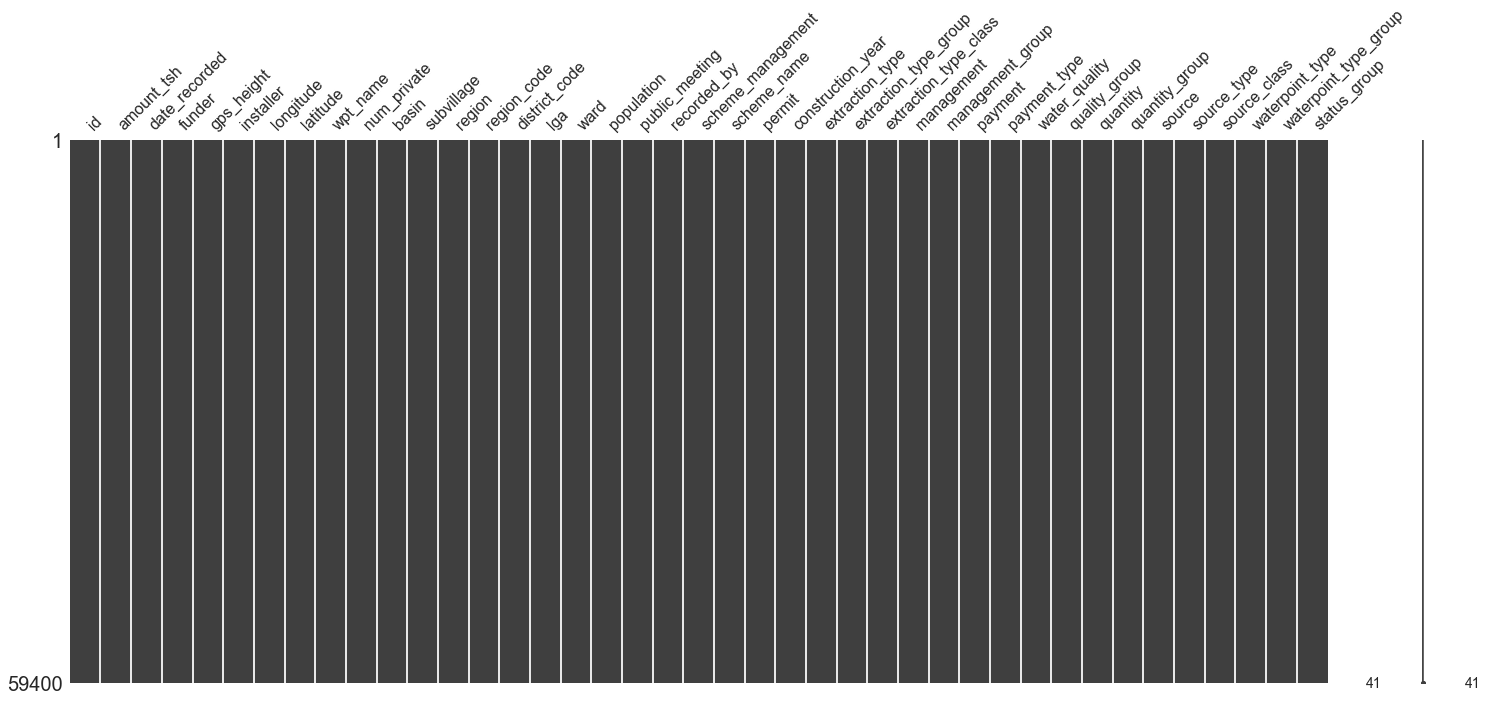

In [26]:
import sys
sys.path.append('/Python/Springboard/missingno/missingno/')
import missingno as msno

msno.matrix(df3.sample(59400))

In [27]:
df_columns = pd.DataFrame()
df_columns['WellFeatures'] = df3.columns
var=[]
cell_type=[]
for k in range(0,41):
    row=len(df3[df3.columns[k]].unique())
    var_type= type(df3.columns[k])
    var=np.append(var,row)
    cell_type=np.append(cell_type,var_type)
df_columns['Unique_Values'] = var
df_columns['Variable_type'] = cell_type
df_columns

,WellFeatures,Unique_Values,Variable_type
0,id,59400.0,<class 'str'>
1,amount_tsh,98.0,<class 'str'>
2,date_recorded,356.0,<class 'str'>
3,funder,1898.0,<class 'str'>
4,gps_height,2428.0,<class 'str'>
5,installer,2146.0,<class 'str'>
6,longitude,57516.0,<class 'str'>
7,latitude,57517.0,<class 'str'>
8,wpt_name,37400.0,<class 'str'>
9,num_private,65.0,<class 'str'>


Remove ''id',scheme_name', 'funder', 'subvillage', 'ward','recorded_by', 'wpt_name','date_recorded'

In [28]:
df3.drop('recorded_by', axis=1, inplace=True) #only 1 value

In [29]:
df3.drop('date_recorded', axis=1, inplace=True)

In [30]:
df3.drop('waterpoint_type', axis=1, inplace=True) #represented by wateroint_type_group

In [31]:
df3.drop('quantity_group', axis=1, inplace=True) #represented by quantity

In [32]:
df3.drop('wpt_name', axis=1, inplace=True) #too many unique values

In [33]:
df3.drop('subvillage', axis=1, inplace=True)  #too many unique values

In [35]:
df3.shape

(59400, 35)

In [36]:
df_columns = pd.DataFrame()
df_columns['WellFeatures'] = df3.columns
var=[]
cell_type=[]
for k in range(0,35):
    row=len(df3[df3.columns[k]].unique())
    var_type= type(df3.columns[k])
    var=np.append(var,row)
    cell_type=np.append(cell_type,var_type)
df_columns['Unique_Values'] = var
df_columns['Variable_type'] = cell_type
df_columns

,WellFeatures,Unique_Values,Variable_type
0,id,59400.0,<class 'str'>
1,amount_tsh,98.0,<class 'str'>
2,funder,1898.0,<class 'str'>
3,gps_height,2428.0,<class 'str'>
4,installer,2146.0,<class 'str'>
5,longitude,57516.0,<class 'str'>
6,latitude,57517.0,<class 'str'>
7,num_private,65.0,<class 'str'>
8,basin,9.0,<class 'str'>
9,region,21.0,<class 'str'>


In [37]:
df3.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'num_private', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [18]:
df3.shape

(59400, 34)

In [38]:
df4=df3[['id', 'amount_tsh', 'gps_height',  'longitude',
       'latitude', 'num_private', 'basin', 'region', 'region_code',
       'district_code','population','funder','installer', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type_group', 'status_group']]

In [40]:

for i in range(11,35):
    df4[df4.columns[i]] = df4[df4.columns[i]].astype('category')
    cat_name = df4.columns[i] +'_cat'
    df4[cat_name] = df4[df4.columns[i]].cat.codes
df4.head(3)

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,...,payment_cat,payment_type_cat,water_quality_cat,quality_group_cat,quantity_cat,source_cat,source_type_cat,source_class_cat,waterpoint_type_group_cat,status_group_cat
0,69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,...,2,0,6,2,1,8,6,0,1,0
1,8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,...,0,2,6,2,2,5,3,1,1,0
2,34310,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,...,4,5,6,2,1,0,1,1,1,0


In [156]:
df4.shape

(59400, 59)

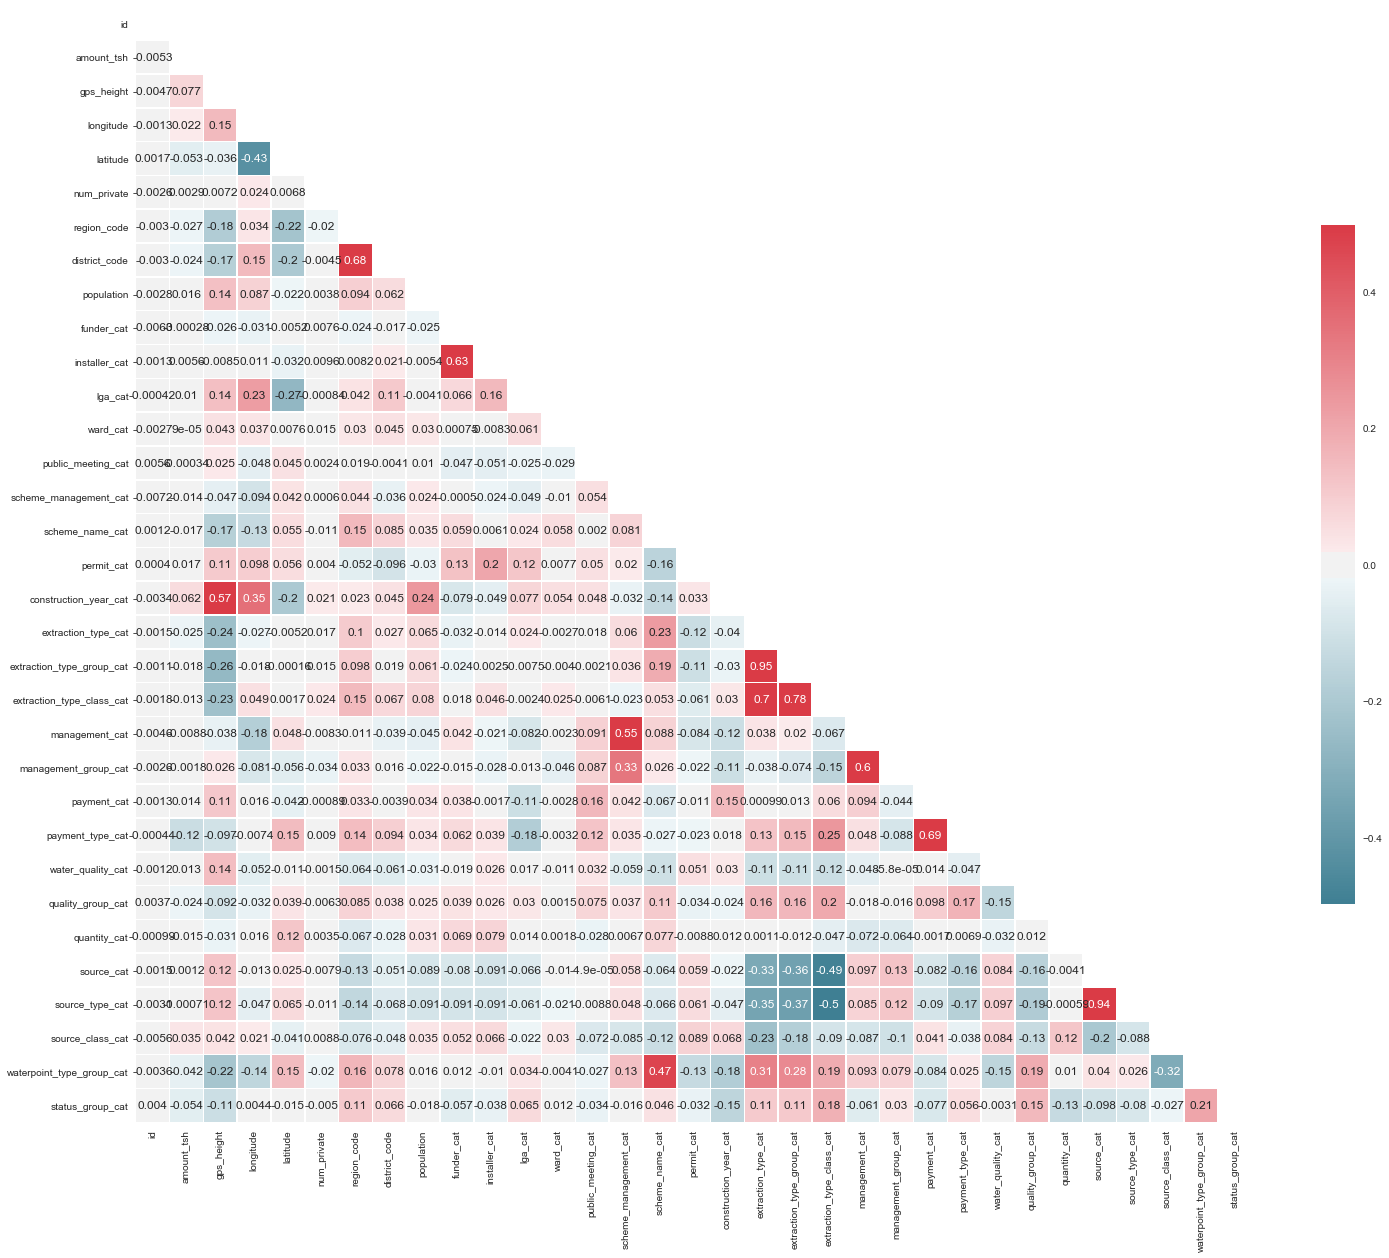

In [41]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")



# Compute the correlation matrix
corr = df4.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('correlation_matrix.png')

In [42]:
y=df3.pop('status_group')

In [43]:
y.shape

(59400,)

In [44]:
df4.shape

(59400, 59)

In [ ]:
df5=df4.copy()

In [ ]:
df5.head()

In [45]:
df3.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'num_private', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type_group'],
      dtype='object')

In [46]:
df3.head(3)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,...,user-group,pay annually,annually,soft,good,enough,spring,spring,groundwater,communal standpipe
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,...,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,...,user-group,pay per bucket,per bucket,soft,good,enough,dam,dam,surface,communal standpipe


In [47]:
df_onehot = pd.get_dummies(df3, columns=['funder','installer', 
       'basin',  'region', 'lga',
       'ward',  'public_meeting', 
       'scheme_management', 'scheme_name', 'permit', 
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 
       'source', 'source_type', 'source_class', 
       'waterpoint_type_group'], prefix=['funder','installer','basin','region','lga','ward','public_meet','scheme_man','scheme_name','permit', 'extract_type', 'extract_group', 'extract_class',
       'manage', 'manage_group', 'payment', 'pay_type',
       'water_qual', 'qual_group', 'quant', 
       'source', 'source_type', 'source_class', 
       'water_group'])

In [276]:
df_onehot.shape

(59400, 9131)

In [49]:
df_onehot.head(10)

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,water_group_cattle trough,water_group_communal standpipe,water_group_dam,water_group_hand pump,water_group_improved spring,water_group_other
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,1,1,0,0,0,1,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,0,0,1,0,0,1,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,1,0,0,1,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,0,1,0,0,0,1,0,0,0,0
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,9944,20.0,0,39.172796,-4.765587,0,4,8,1,2009,...,0,0,0,1,0,1,0,0,0,0
6,19816,0.0,0,33.362410,-3.766365,0,17,3,0,0,...,0,1,0,0,0,0,0,1,0,0
7,54551,0.0,0,32.620617,-4.226198,0,17,3,0,0,...,0,1,0,0,0,0,0,1,0,0
8,53934,0.0,0,32.711100,-5.146712,0,14,6,0,0,...,0,1,0,0,0,0,0,1,0,0
9,46144,0.0,0,30.626991,-1.257051,0,18,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [277]:
df6 = df_onehot.copy()

In [299]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X=df6



X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, y, test_size=0.2, random_state = 5)
print (X_train3.shape)
print (X_test3.shape)
print (Y_train3.shape)
print (Y_test3.shape)

(47520, 9131)
(11880, 9131)
(47520,)
(11880,)


In [279]:
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train3, Y_train3)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test3), Y_test3))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.712121212121


In [207]:
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train3, Y_train3)
# Print the accuracy from the testing data.
print('accuracy_score: ',accuracy_score(clf.predict(X_test3), Y_test3))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

accuracy_score:  0.712121212121


In [53]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100,1000]
results = []
max_score = 0
for c in Cs:
    clf = LogisticRegression(C=c)
    clf.fit(X_train3, Y_train3)
    score = accuracy_score(clf.predict(X_train3),Y_train3)
    print ('%f score: %f' % (c, score))
    if (score > max_score):
        max_score = score
        best_c = c
print ("Best C: " + str(best_c))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.001000 score: 0.711048


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.100000 score: 0.709617


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

1.000000 score: 0.708418


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

10.000000 score: 0.704230


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

100.000000 score: 0.711511


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

1000.000000 score: 0.729272
Best C: 1000


In [280]:
best_c

1000

In [281]:
clf = LogisticRegression(C=best_c)
clf.fit(X_train3, Y_train3)
accuracy = accuracy_score(clf.predict(X_test3),Y_test3)
print(accuracy)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.732828282828


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Confusion matrix, without normalization
[[5881  654    3]
 [1687 2812    5]
 [ 653  172   13]]


Normalized confusion matrix
[[  9.00e-01   1.00e-01   4.59e-04]
 [  3.75e-01   6.24e-01   1.11e-03]
 [  7.79e-01   2.05e-01   1.55e-02]]


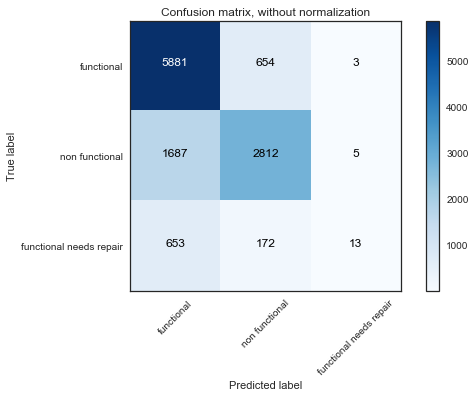

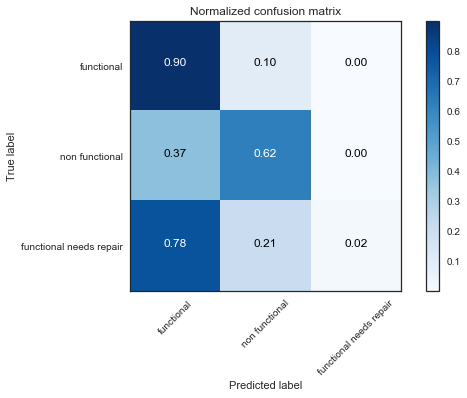

In [282]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = y.unique()

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
clf = LogisticRegression(C=best_c)
clf.fit(X_train3, Y_train3)
y_pred = clf.fit(X_train3, Y_train3).predict(X_test3)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test3, y_pred, ['functional', 'non functional', 'functional needs repair'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
plt.savefig('confusion_matrix_logregr.png')

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

clf = LogisticRegression(C=best_c)
df_kfold = pd.DataFrame(['Scores', 'MSE','STD'], columns = ['KFolds Score'])


    
scores = cross_val_score(clf, X_train3, Y_train3, scoring='accuracy', cv=4)
kfold_mse = np.mean(np.abs(scores))
kfold_std = np.std(scores)

print("KFold Scores:", scores)
print("Mean KFold Scores:", kfold_mse)
print('Std KFold Scores:', kfold_std)


KFold Scores: [ 0.74  0.72  0.71  0.71]
Mean KFold Scores: 0.720096137881
Std KFold Scores: 0.0130376181921


In [283]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise')[source]¶
param_grid = {'C': [0.001, 0.1, 1, 10, 100,1000,10000]}
clf = GridSearchCV(LogisticRegression(), param_grid=param_grid)
clf.fit(X_train3, Y_train3.values.ravel())
print("Best Params:")
print(clf.best_params_)

print ("Grid scores:")
for params, mean_score, scores in clf.grid_scores_:
    print("%0.6f (+/-%0.06f) for %r"
          % (mean_score, scores.std() * 2, params))
    
accuracy = accuracy_score(clf.predict(X_test3),Y_test3)
print("Accuracy: %f" % accuracy)

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Y_test3, clf.predict(X_test3)
print(classification_report(y_true, y_pred))

print("Best Estimator: ")
print(clf.best_estimator_)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Best Params:
{'C': 1}
Grid scores:
0.707323 (+/-0.003699) for {'C': 0.001}
0.709133 (+/-0.010594) for {'C': 0.1}
0.718645 (+/-0.023445) for {'C': 1}
0.706545 (+/-0.002991) for {'C': 10}
0.708523 (+/-0.017473) for {'C': 100}
0.708544 (+/-0.016037) for {'C': 1000}
0.706881 (+/-0.015776) for {'C': 10000}
Accuracy: 0.712121
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

                         precision    recall  f1-score   support

             functional       0.69      0.90      0.78      6538
functional needs repair       0.20      0.00      0.00       838
         non functional       0.76      0.57      0.65      4504

            avg / total       0.68      0.71      0.68     11880

Best Estimator: 
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solve

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Confusion matrix, without normalization
[[5881  654    3]
 [1687 2812    5]
 [ 653  172   13]]


Normalized confusion matrix
[[  9.00e-01   1.00e-01   4.59e-04]
 [  3.75e-01   6.24e-01   1.11e-03]
 [  7.79e-01   2.05e-01   1.55e-02]]


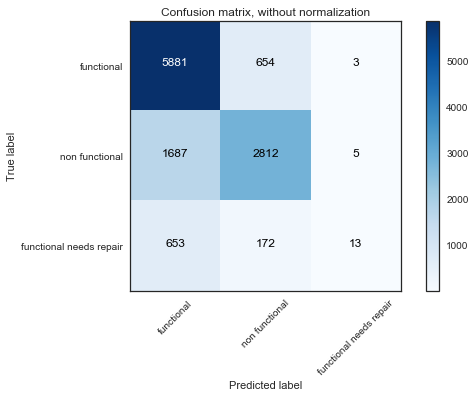

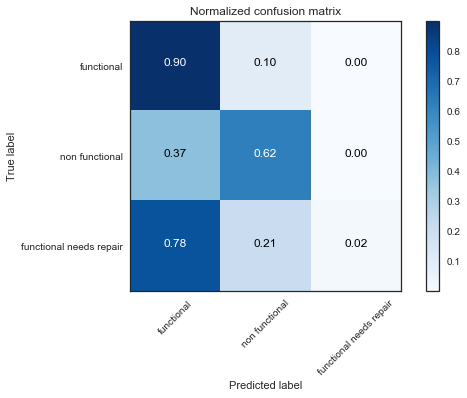

In [284]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = y.unique()

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
clf = LogisticRegression(C=best_c)
clf.fit(X_train3, Y_train3)
y_pred = clf.fit(X_train3, Y_train3).predict(X_test3)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test3, y_pred, ['functional', 'non functional', 'functional needs repair'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
plt.savefig('confusion_matrix_logregr2.png')

In [245]:
class_names

array(['functional', 'non functional', 'functional needs repair'], dtype=object)

In [246]:
cnf_matrix

array([[1048,  325, 5165],
       [  80,  145,  613],
       [ 237,   88, 4179]])

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np






names = df6.columns
rf = RandomForestClassifier(n_estimators = 100, oob_score = True,n_jobs = 1,random_state =1)
rf.fit(X_train3, Y_train3)
accuracy = accuracy_score(rf.predict(X_test3),Y_test3)
print ("Score : ", accuracy )


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

Score :  0.798316498316


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

Confusion matrix, without normalization
[[5707  620  211]
 [ 926 3509   69]
 [ 439  131  268]]


Normalized confusion matrix
[[ 0.87  0.09  0.03]
 [ 0.21  0.78  0.02]
 [ 0.52  0.16  0.32]]


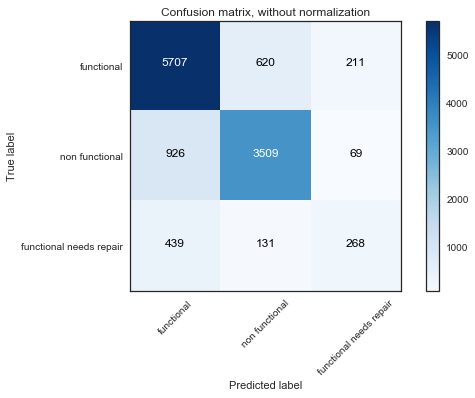

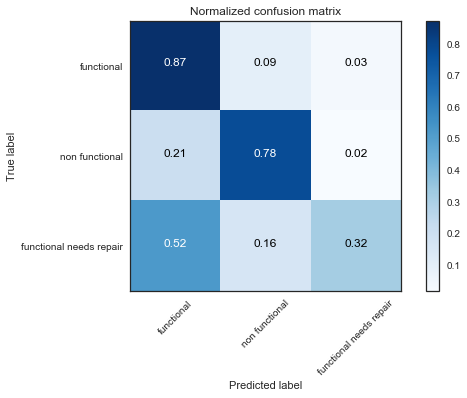

                         precision    recall  f1-score   support

             functional       0.81      0.87      0.84      6538
functional needs repair       0.49      0.32      0.39       838
         non functional       0.82      0.78      0.80      4504

            avg / total       0.79      0.80      0.79     11880



In [300]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = y.unique()

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
clf = RandomForestClassifier(n_estimators = 100, oob_score = True,n_jobs = -1,random_state =1)
clf.fit(X_train3, Y_train3)
y_pred = clf.fit(X_train3, Y_train3).predict(X_test3)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test3, y_pred, ['functional', 'non functional', 'functional needs repair'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('confusion_matrix_rfnorm.png')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('confusion_matrix_rf.png')
plt.show()
print(classification_report(Y_test3, y_pred))

In [79]:
y_pred.shape

(11880,)

In [80]:
Y_test3.shape

(11880,)

In [112]:
df_target = pd.DataFrame({'test3': Y_test3, 'Predict': y_pred})

In [73]:
df_target['test3']

22482                 functional
17086    functional needs repair
11307             non functional
58375                 functional
19962                 functional
15949                 functional
27461             non functional
205               non functional
26603                 functional
29405                 functional
2769              non functional
58334             non functional
39976             non functional
41980                 functional
3031              non functional
33510                 functional
46953                 functional
17200                 functional
33657             non functional
33399             non functional
27607             non functional
51881                 functional
21188                 functional
35891             non functional
59098             non functional
35653             non functional
14895                 functional
336               non functional
2508              non functional
58925                 functional
          

In [147]:
len(df_target.test3)

11880

In [148]:
df_target.shape

(11880, 4)

In [119]:
df_target = df_target.reset_index()

In [120]:
df_target.head(3)

,index,Predict,test3
0,22482,functional,functional
1,17086,functional needs repair,functional needs repair
2,11307,non functional,non functional


In [84]:
X_test3.head(2)

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,water_group_cattle trough,water_group_communal standpipe,water_group_dam,water_group_hand pump,water_group_improved spring,water_group_other
22482,53820,5000.0,611,36.886346,-11.371689,0,10,1,1,1996,...,0,1,0,0,0,0,0,1,0,0
17086,21101,0.0,1181,32.929071,-2.052382,0,19,1,450,1993,...,1,1,0,0,0,0,0,0,1,0


In [132]:
df_target.rename(columns={'index':'id'}, inplace=True)

In [149]:
df_target.head(3)

,id,Predict,test3,Scores
0,22482,functional,functional,True Functional
1,17086,functional needs repair,functional needs repair,True functional needs repair
2,11307,non functional,non functional,True Non Functional


In [150]:
Scores = []
for i in range(len(df_target.test3)):
    if df_target.Predict[i] == 'functional' and df_target.test3[i] == 'functional':
        Scores.append("True Functional")
    elif df_target.Predict[i] == 'functional' and (df_target.test3[i] == 'non functional' or  df_target.test3[i] == 'functional needs repair'):
        Scores.append("False Functional")
    elif df_target.Predict[i] == 'non functional' and df_target.test3[i] == 'non functional':
        Scores.append("True Non Functional")
    elif df_target.Predict[i] == 'non functional' and (df_target.test3[i] == 'functional' or  df_target.test3[i] == 'functional needs repair'):
        Scores.append("False Non Functional") 
    elif df_target.Predict[i] == 'functional needs repair' and df_target.test3[i] == 'functional needs repair':
       Scores.append("True functional needs repair")
    else :
        Scores.append("False functional needs repair")
df_target['Scores']=Scores

In [151]:
df_target.shape

(11880, 4)

In [152]:
df_target.head(3)

,id,Predict,test3,Scores
0,22482,functional,functional,True Functional
1,17086,functional needs repair,functional needs repair,True functional needs repair
2,11307,non functional,non functional,True Non Functional


In [165]:
result = pd.merge(df4, df_target, left_index=True, right_index=True, how='inner', on='id')

In [167]:
result.head(3)

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,...,quality_group_cat,quantity_cat,source_cat,source_type_cat,source_class_cat,waterpoint_type_group_cat,status_group_cat,Predict,test3,Scores
0,69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,...,2,1,8,6,0,1,0,functional,functional,True Functional
1,8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,...,2,2,5,3,1,1,0,functional needs repair,functional needs repair,True functional needs repair
2,34310,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,...,2,1,0,1,1,1,0,non functional,non functional,True Non Functional


In [166]:
result.shape

(11880, 62)

In [168]:
result.Scores = result.Scores.astype('category')
result['Score_cat'] = result.Scores.cat.codes

In [169]:
result.head(3)

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,...,quantity_cat,source_cat,source_type_cat,source_class_cat,waterpoint_type_group_cat,status_group_cat,Predict,test3,Scores,Score_cat
0,69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,...,1,8,6,0,1,0,functional,functional,True Functional,3
1,8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,...,2,5,3,1,1,0,functional needs repair,functional needs repair,True functional needs repair,5
2,34310,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,...,1,0,1,1,1,0,non functional,non functional,True Non Functional,4


In [171]:
dict( enumerate(result.Scores.cat.categories) )

{0: 'False Functional',
 1: 'False Non Functional',
 2: 'False functional needs repair',
 3: 'True Functional',
 4: 'True Non Functional',
 5: 'True functional needs repair'}

(25, 45)

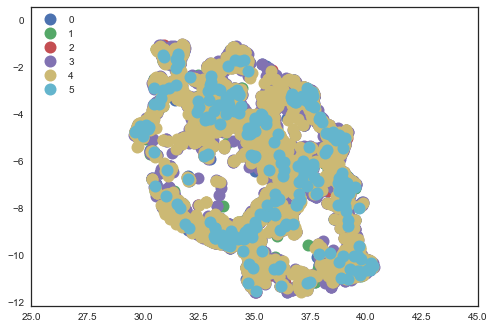

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


groups = result.groupby('Score_cat')

# Plot
###plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
###colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')
###colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, 6))
fig, ax = plt.subplots()
###ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='upper left')
plt.xlim(25, 45)
plt.show()

(27.5, 41.5)

(27.5, 41.5)

(27.5, 41.5)

(27.5, 41.5)

(27.5, 41.5)

(27.5, 41.5)

C:\Users\jtlam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


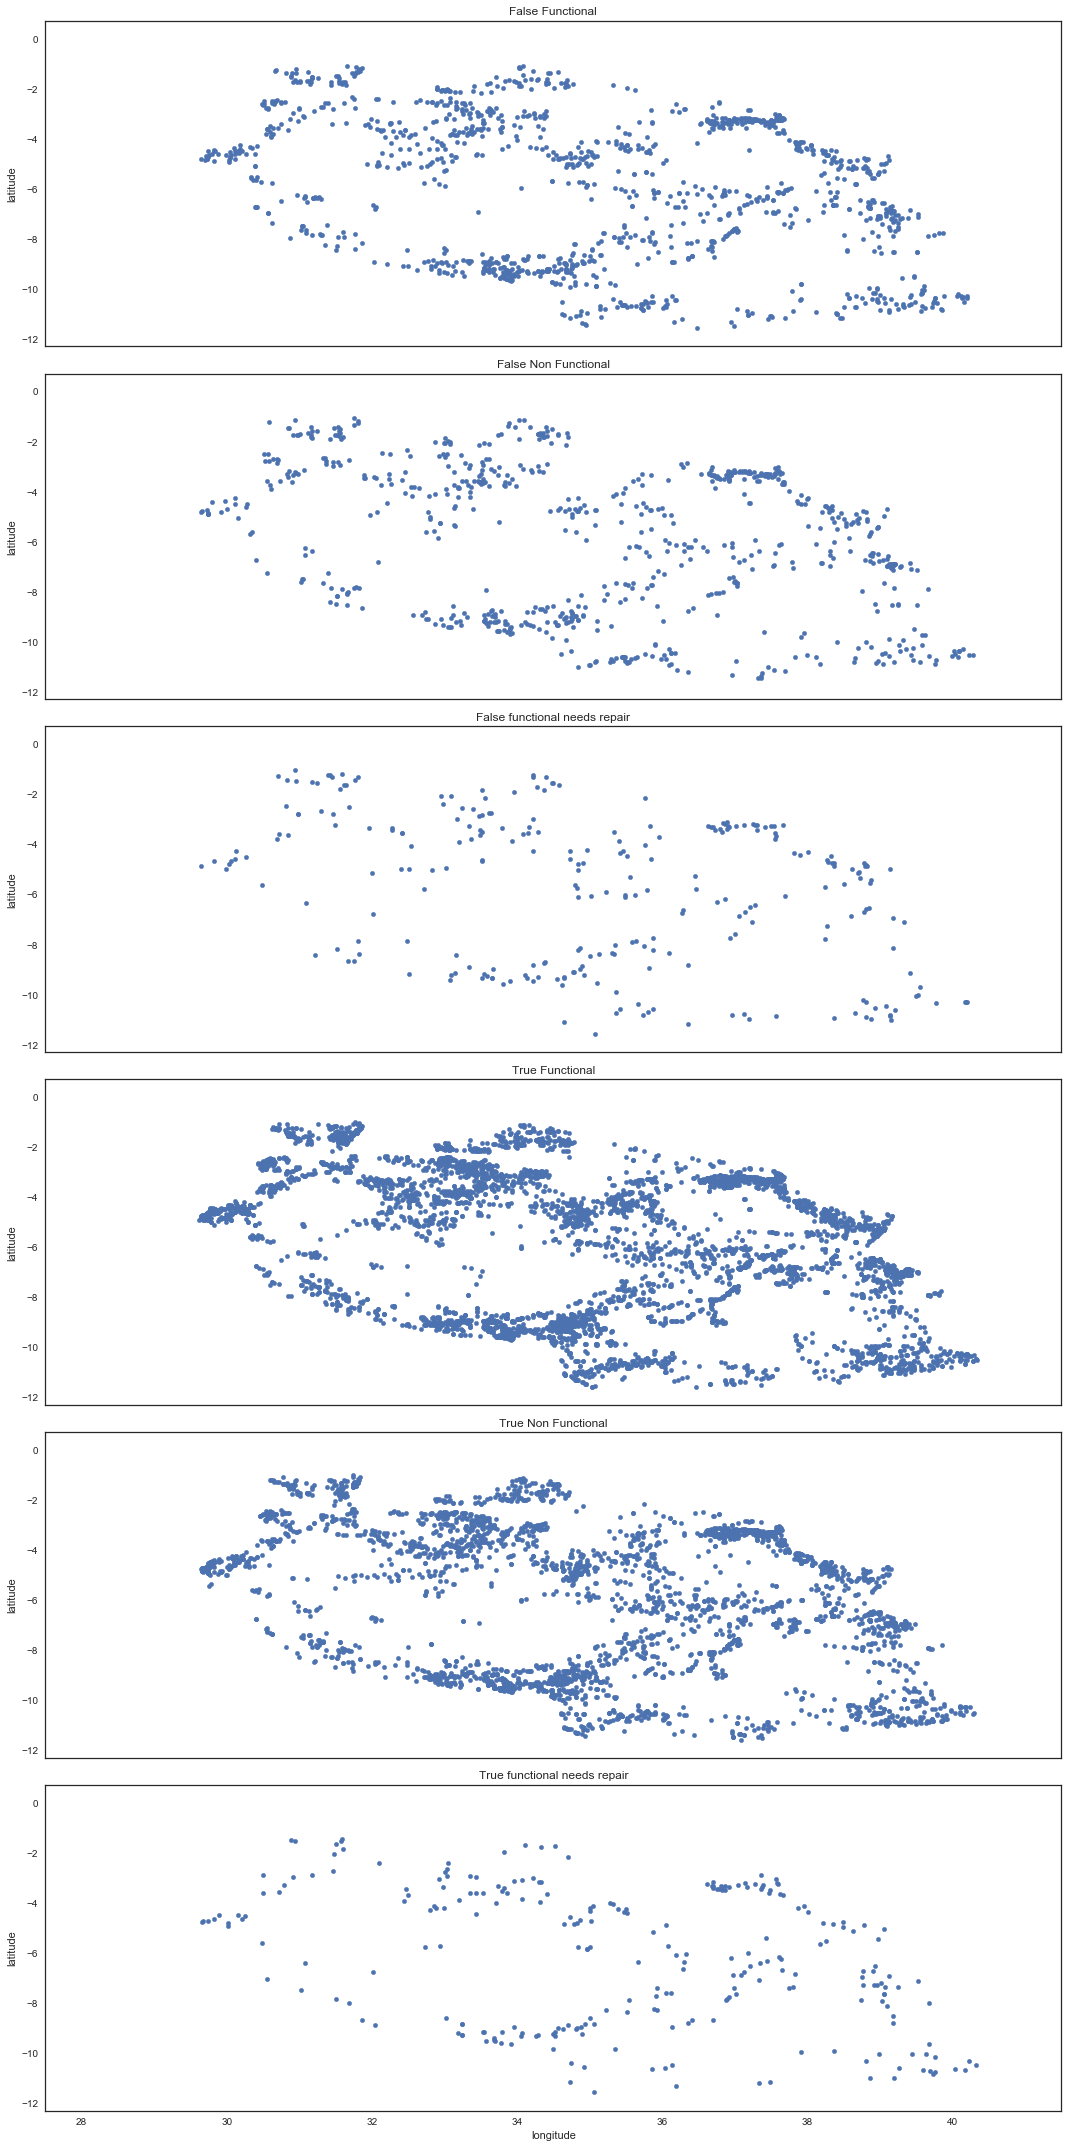

In [187]:
fig, axes = plt.subplots(nrows=6, ncols=1, sharex=True, sharey=True, figsize=(15,30),squeeze=False)
axes_list = [item for sublist in axes for item in sublist] 
###colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')
###ax.set_color_cycle(colors)
for k, v in result.groupby('Scores'):
    ax = axes_list.pop(0)
    
    v.plot(x='longitude', y='latitude',kind ='scatter', label=k, ax=ax, legend=False)
    plt.xlim(27.5, 41.5)
    ax.set_title(k)
    ###ax.set_color_cycle(colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
plt.savefig('map_scores.png')    
plt.tight_layout()

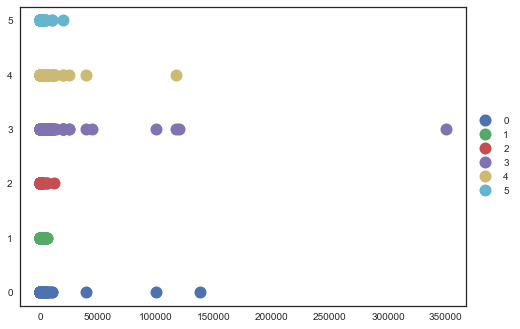

In [191]:
# Plot
###plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
###colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

fig, ax = plt.subplots()
#ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.amount_tsh, group.Score_cat, marker='o', linestyle='', ms=12, label=name)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('amt_score.png')
plt.show()

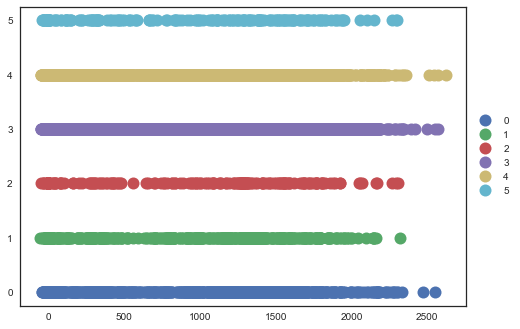

In [192]:
# Plot
###plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
###colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

fig, ax = plt.subplots()
###ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.gps_height, group.Score_cat, marker='o', linestyle='', ms=12, label=name)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('gps_score.png')
plt.show()

In [194]:
dict( enumerate(result.Scores.cat.categories) )

{0: 'False Functional',
 1: 'False Non Functional',
 2: 'False functional needs repair',
 3: 'True Functional',
 4: 'True Non Functional',
 5: 'True functional needs repair'}

In [198]:
group.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'basin', 'region', 'region_code', 'district_code',
       'population', 'funder', 'installer', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type_group', 'status_group', 'funder_cat',
       'installer_cat', 'lga_cat', 'ward_cat', 'public_meeting_cat',
       'scheme_management_cat', 'scheme_name_cat', 'permit_cat',
       'construction_year_cat', 'extraction_type_cat',
       'extraction_type_group_cat', 'extraction_type_class_cat',
       'management_cat', 'management_group_cat', 'payment_cat',
       'payment_type_cat', 'water_quality_cat', 'quality_group_cat',
       'quantity_cat', 

In [202]:
group.columns[57]

'waterpoint_type_group_cat'

C:\Users\jtlam\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


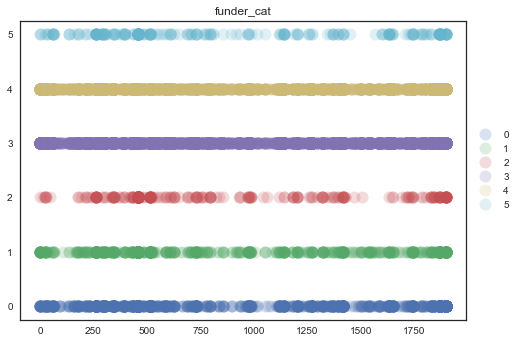

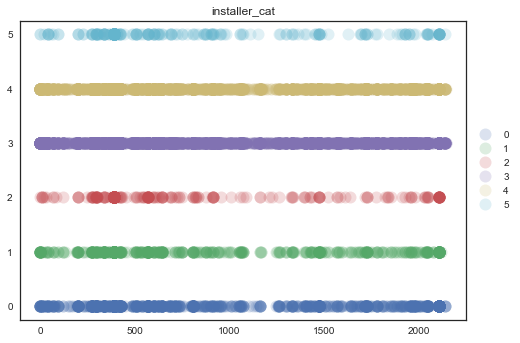

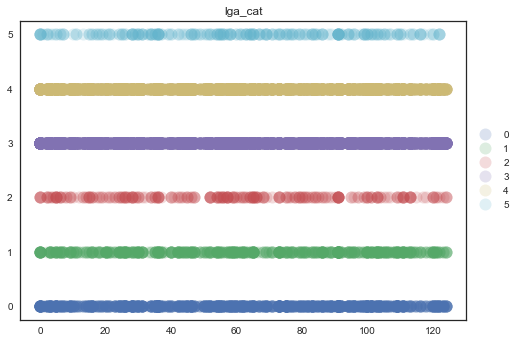

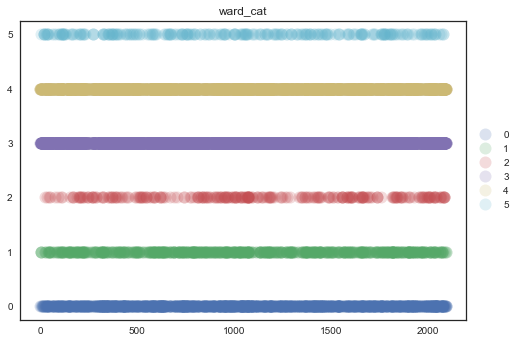

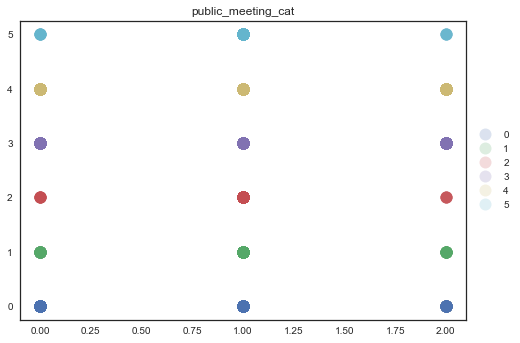

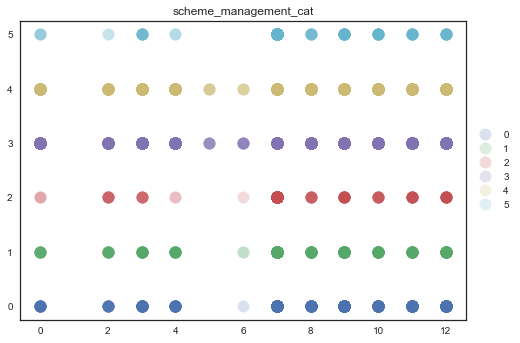

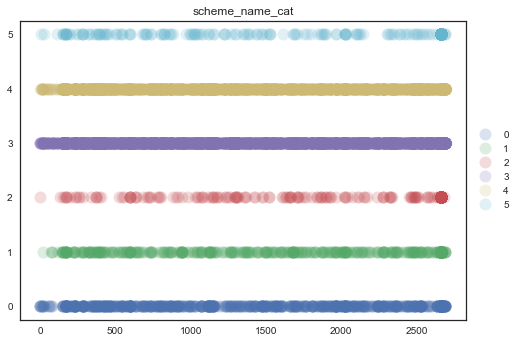

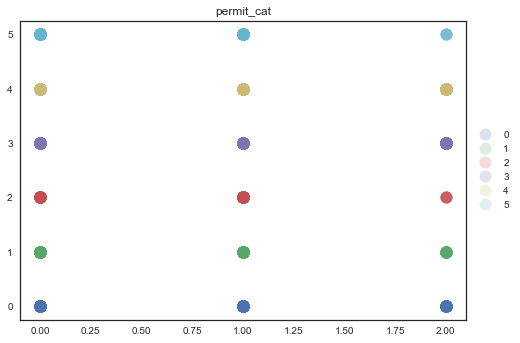

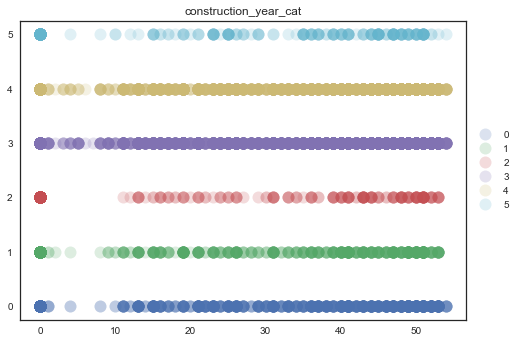

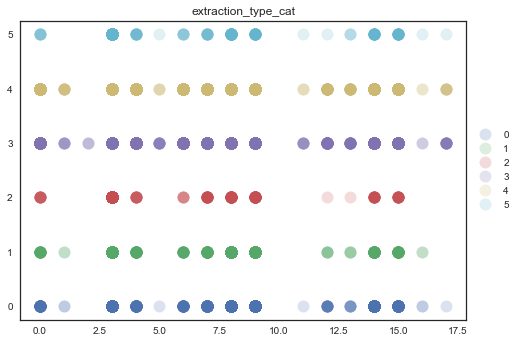

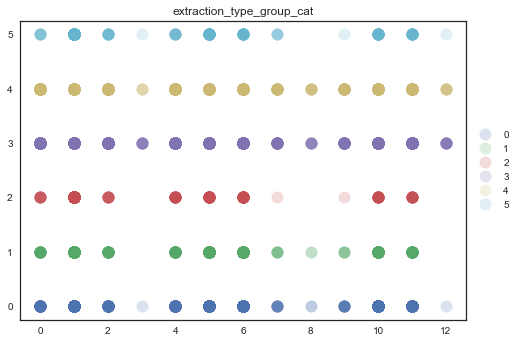

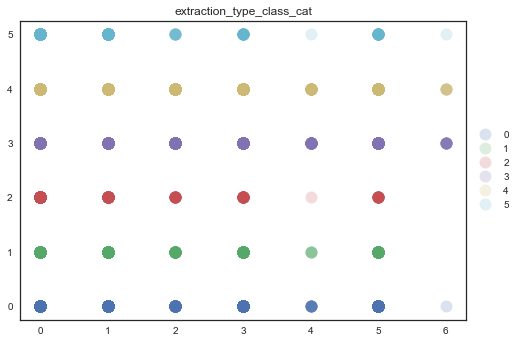

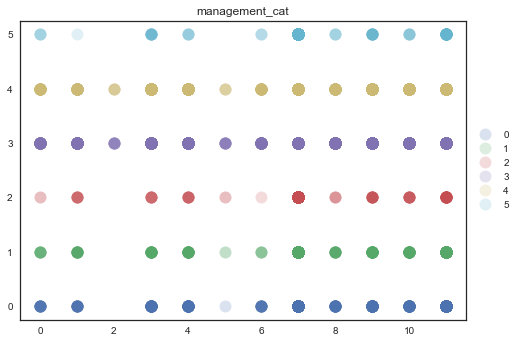

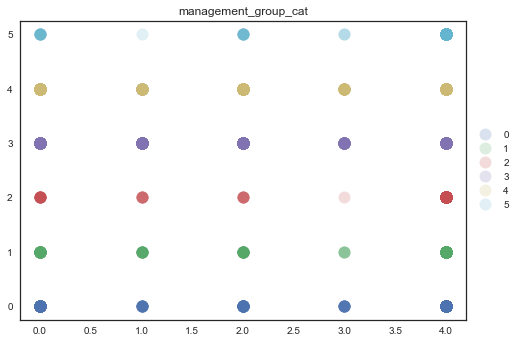

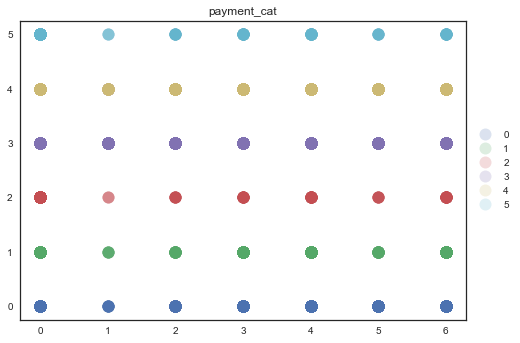

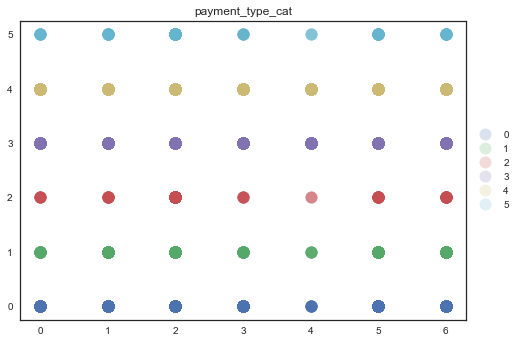

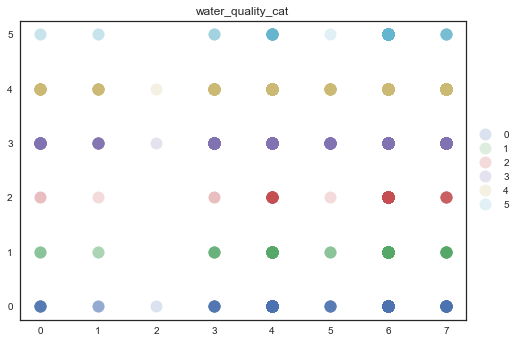

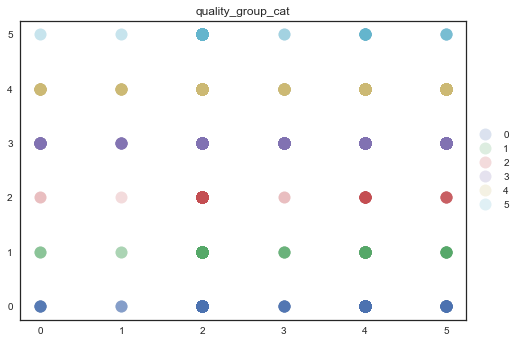

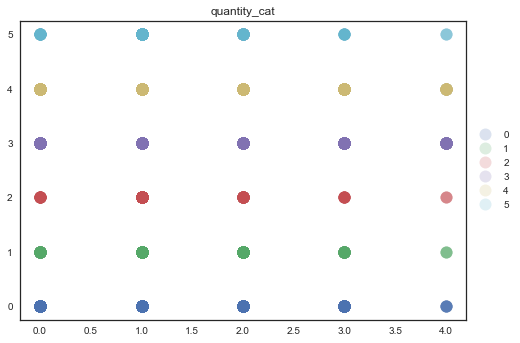

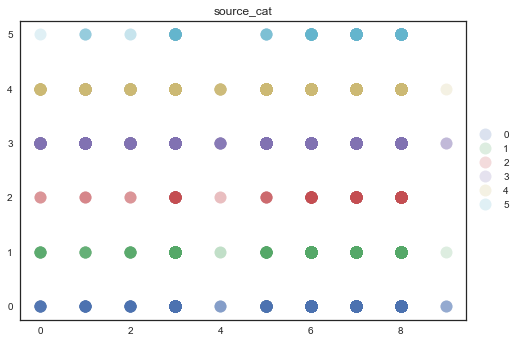

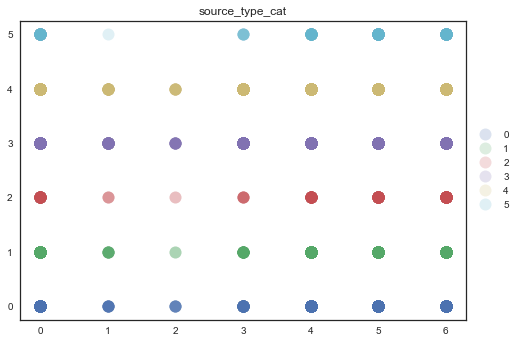

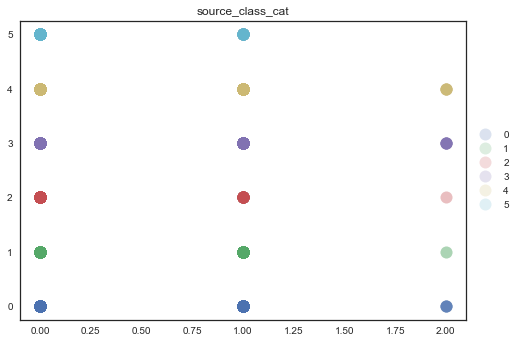

In [203]:
# Plot
###plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
###colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')


for i in range(35,57):
    fig, ax = plt.subplots()
    
    ###ax.set_color_cycle(colors)
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group[group.columns[i]], group.Score_cat, marker='o', linestyle='', ms=12, label=name, alpha =0.2)
    plt.title(result.columns[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(result.columns[i]+'.png')
plt.show()

In [149]:
result.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'basin', 'region', 'region_code', 'district_code',
       'population', 'funder', 'installer', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type_group', 'funder_cat', 'installer_cat',
       'lga_cat', 'ward_cat', 'public_meeting_cat', 'scheme_management_cat',
       'scheme_name_cat', 'permit_cat', 'construction_year_cat',
       'extraction_type_cat', 'extraction_type_group_cat',
       'extraction_type_class_cat', 'management_cat', 'management_group_cat',
       'payment_cat', 'payment_type_cat', 'water_quality_cat',
       'quality_group_cat', 'quantity_cat', 'source_cat', 'source_t

In [204]:
result.shape

(11880, 63)

In [155]:
group

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,...,water_quality_cat,quality_group_cat,quantity_cat,source_cat,source_type_cat,source_class_cat,Predict,test3,Score,Score_cat
55,13195,0.0,0,36.045840,-5.929901,0,Wami / Ruvu,Dodoma,1,5,...,6,2,0,3,0,0,functional needs repair,functional needs repair,True functional needs repair,5
72,6788,0.0,1176,35.870877,-4.136903,0,Internal,Manyara,21,1,...,6,2,1,8,6,0,functional needs repair,functional needs repair,True functional needs repair,5
89,11754,0.0,0,33.926086,-3.699318,0,Internal,Shinyanga,17,8,...,6,2,2,7,5,0,functional needs repair,functional needs repair,True functional needs repair,5
185,51371,0.0,0,30.863523,-1.439924,0,Lake Victoria,Kagera,18,1,...,6,2,3,5,3,1,functional needs repair,functional needs repair,True functional needs repair,5
196,89,0.0,0,36.089782,-6.690796,0,Rufiji,Dodoma,1,1,...,6,2,2,8,6,0,functional needs repair,functional needs repair,True functional needs repair,5
226,11010,1000.0,1981,35.724405,-8.264425,0,Rufiji,Iringa,11,2,...,6,2,3,8,6,0,functional needs repair,functional needs repair,True functional needs repair,5
227,49775,0.0,0,30.600940,-1.206933,0,Lake Victoria,Kagera,18,1,...,6,2,3,8,6,0,functional needs repair,functional needs repair,True functional needs repair,5
241,19244,0.0,1531,34.841207,-4.765074,0,Internal,Singida,13,2,...,6,2,2,7,5,0,functional needs repair,functional needs repair,True functional needs repair,5
264,5091,5000.0,1687,34.503970,-9.122076,0,Rufiji,Iringa,11,4,...,6,2,1,6,4,1,functional needs repair,functional needs repair,True functional needs repair,5
265,49438,0.0,1474,36.824851,-3.324245,0,Pangani,Arusha,2,7,...,6,2,2,8,6,0,functional needs repair,functional needs repair,True functional needs repair,5


In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np






names = df6.columns
rf = RandomForestClassifier(n_estimators = 100, oob_score = True,n_jobs = 1,random_state =1)
rf.fit(X_train3, Y_train3)

print ("Score : ", rf.score(X_test3,Y_test3 ))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

Score :  0.798316498316


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np



# Create a function called rf,
def randomforest_leaf(sample_leaf_options):
    # Create an empty data frame
    df_rf = pd.DataFrame()

    # Create a column of feature names

    
    df_rf['Leaf'] = (['score','n_features'])
    
    

   # For each alpha value in the list of alpha values,
    for leaf_size in sample_leaf_options :
            # Create a random forest regression,
        rf = RandomForestClassifier(n_estimators = 500, oob_score = True,n_jobs = 1,random_state =1, max_features = "auto", min_samples_leaf = leaf_size)

            # Fit the lasso regression
        rf.fit(X_train3,Y_train3)
            # Create a column name for that leaf size value
        column_name = 'Leaf Size %f' % leaf_size

            # Create a column of coefficient values
        var1 =  rf.score(X_test3,Y_test3 )
        var = np.append(var1,rf.n_features_)
        df_rf[column_name] = var

        # Return the dataframe    
    return df_rf


In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np


rf = RandomForestClassifier(n_estimators = 100, oob_score = True,n_jobs = -1,random_state =1, min_samples_leaf = 50)
rf.fit(X_train3, Y_train3)

print ("Score : ", rf.score(X_test3,Y_test3 ))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

Score :  0.707491582492


In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np


rf = RandomForestClassifier(n_estimators = 100, oob_score = True,n_jobs = -1,random_state =1, min_samples_leaf = 50)
rf.fit(X_train3, Y_train3)


print('accuracy_score: ',accuracy_score(rf.predict(X_test3), Y_test3))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

accuracy_score:  0.707491582492


In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np


rf = RandomForestClassifier(n_estimators = 100, oob_score = True,n_jobs = -1,random_state =1, min_samples_leaf = 500)
rf.fit(X_train3, Y_train3)

print('accuracy_score: ',accuracy_score(rf.predict(X_test3), Y_test3))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=500,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

accuracy_score:  0.59797979798


In [218]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np


rf = RandomForestClassifier(n_estimators = 100, oob_score = True,random_state =1, n_jobs=-1, min_samples_leaf = 1500)
rf.fit(X_train3, Y_train3)

print('accuracy_score: ',accuracy_score(rf.predict(X_test3), Y_test3))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1500,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

accuracy_score:  0.550420875421


In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np


rf = RandomForestClassifier(n_estimators = 100, oob_score = True,random_state =1, n_jobs=-1, min_samples_leaf = 1)
rf.fit(X_train3, Y_train3)

print('accuracy_score: ',accuracy_score(rf.predict(X_test3), Y_test3))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

accuracy_score:  0.798316498316


In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np


rf = RandomForestClassifier(n_estimators = 500, oob_score = True,random_state =1, n_jobs=-1, min_samples_leaf = 1)
rf.fit(X_train3, Y_train3)

print('accuracy_score: ',accuracy_score(rf.predict(X_test3), Y_test3))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

accuracy_score:  0.799242424242


In [287]:
df7=df6.copy()

In [302]:
df7.head(2)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,funder_0,...,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,water_group_cattle trough,water_group_communal standpipe,water_group_dam,water_group_hand pump,water_group_improved spring,water_group_other
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,0,...,1,1,0,0,0,1,0,0,0,0
1,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,0,...,0,0,1,0,0,1,0,0,0,0


In [289]:
df7.drop('id', axis=1, inplace=True)

In [301]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X=df7



X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, y, test_size=0.2, random_state = 5)
print (X_train3.shape)
print (X_test3.shape)
print (Y_train3.shape)
print (Y_test3.shape)

(47520, 9130)
(11880, 9130)
(47520,)
(11880,)


In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np


rf = RandomForestClassifier(n_estimators = 500, oob_score = True,n_jobs = -1,random_state =1)
rf.fit(X_train3, Y_train3)

print ("Score : ", rf.score(X_test3,Y_test3 ))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

Score :  0.799326599327


(47520, 9129)
(11880, 9129)
(47520,)
(11880,)


In [225]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
NaBayes = GaussianNB()
NaBayes.fit(X_train3, Y_train3)
print ("The accuracy score for the training set is %f" % NaBayes.score(X_train3, Y_train3))
print ("The accuracy score for the test set is %f" % NaBayes.score(X_test3, Y_test3))

GaussianNB(priors=None)

The accuracy score for the training set is 0.448548
The accuracy score for the test set is 0.440404


GaussianNB(priors=None)

GaussianNB(priors=None)

Confusion matrix, without normalization
[[2087 1067 3384]
 [ 362 2415 1727]
 [  31   77  730]]


Normalized confusion matrix
[[ 0.32  0.16  0.52]
 [ 0.08  0.54  0.38]
 [ 0.04  0.09  0.87]]


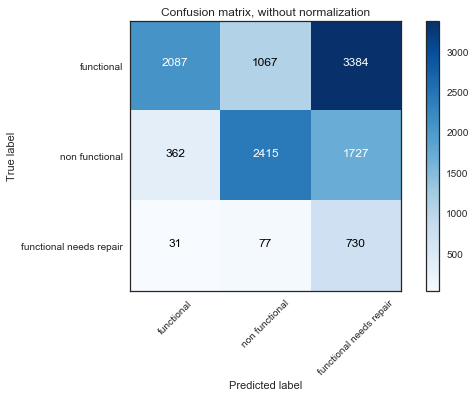

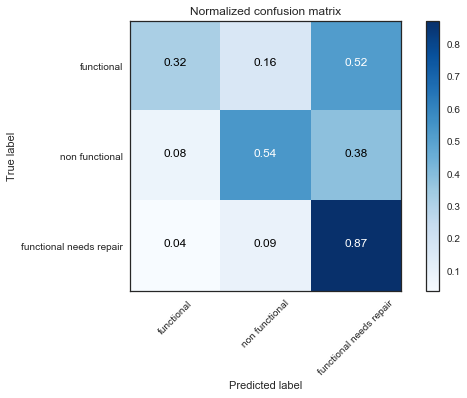

                         precision    recall  f1-score   support

             functional       0.84      0.32      0.46      6538
functional needs repair       0.12      0.87      0.22       838
         non functional       0.68      0.54      0.60      4504

            avg / total       0.73      0.44      0.50     11880



In [303]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = y.unique()

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
NaBayes = GaussianNB()
NaBayes.fit(X_train3, Y_train3)

clf = NaBayes = GaussianNB()
clf.fit(X_train3, Y_train3)
y_pred = clf.fit(X_train3, Y_train3).predict(X_test3)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test3, y_pred, ['functional', 'non functional', 'functional needs repair'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('Gaussian_Confusion_Matrix.png')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('Gaussian_Confusion_Matrixnorm.png')
plt.show()
print(classification_report(Y_test3, y_pred))

In [304]:
df8=df7.copy()

In [305]:
df8.drop('latitude', axis=1, inplace=True)

In [306]:
df8.drop('gps_height', axis=1, inplace=True)

In [307]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X=df8



X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, y, test_size=0.2, random_state = 5)
print (X_train3.shape)
print (X_test3.shape)
print (Y_train3.shape)
print (Y_test3.shape)

(47520, 9128)
(11880, 9128)
(47520,)
(11880,)


In [297]:
from sklearn.naive_bayes import MultinomialNB
NaBayes = MultinomialNB()
NaBayes.fit(X_train3, Y_train3)
print ("The accuracy score for the training set is %f" % NaBayes.score(X_train3, Y_train3))
print ("The accuracy score for the test set is %f" % NaBayes.score(X_test3, Y_test3))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

The accuracy score for the training set is 0.458986
The accuracy score for the test set is 0.452189


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Confusion matrix, without normalization
[[1048 5165  325]
 [ 237 4179   88]
 [  80  613  145]]


Normalized confusion matrix
[[ 0.16  0.79  0.05]
 [ 0.05  0.93  0.02]
 [ 0.1   0.73  0.17]]


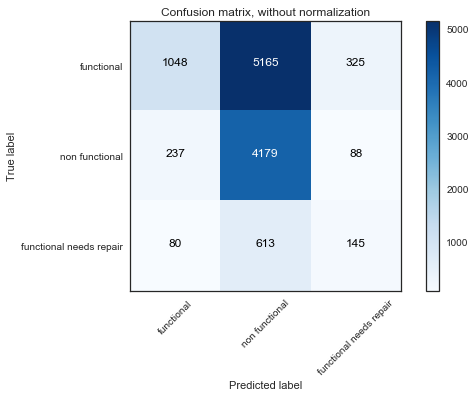

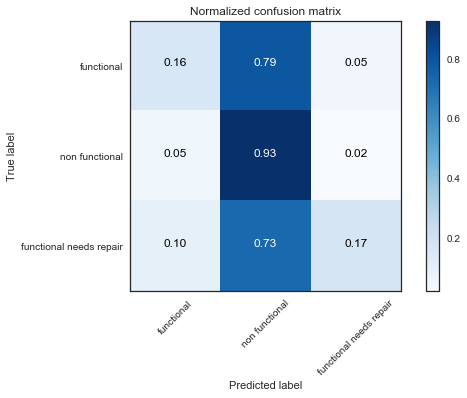

                         precision    recall  f1-score   support

             functional       0.77      0.16      0.27      6538
functional needs repair       0.26      0.17      0.21       838
         non functional       0.42      0.93      0.58      4504

            avg / total       0.60      0.45      0.38     11880



In [308]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = y.unique()

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
NaBayes = MultinomialNB()

clf = NaBayes 
clf.fit(X_train3, Y_train3)
y_pred = clf.fit(X_train3, Y_train3).predict(X_test3)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test3, y_pred, ['functional', 'non functional', 'functional needs repair'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('NB_confusion_matrix.png')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('NB_confusion_matrixnorm.png')
plt.show()
print(classification_report(Y_test3, y_pred))

In [267]:
class_names

array(['functional', 'non functional', 'functional needs repair'], dtype=object)

In [273]:
df_NB.head(5)

,True,Predict,counts
22482,functional,functional,1
17086,functional needs repair,non functional,1
11307,non functional,non functional,1
58375,functional,non functional,1
19962,functional,functional needs repair,1


In [250]:
df_NB = pd.DataFrame()

In [253]:
df_NB['True']=Y_test3

In [254]:
df_NB['Predict']=y_pred

In [261]:
df_NB['counts']=1

In [271]:
df_agg2 = df_NB.groupby(['True'],as_index=False, sort=False)['counts'].count()

In [272]:
df_agg2

,True,counts
0,functional,6538
1,functional needs repair,838
2,non functional,4504


In [264]:
df_agg3 = df_NB.groupby(['Predict'],as_index=False, sort=False)['counts'].count()

In [265]:
df_agg3

,Predict,counts
0,functional,1365
1,non functional,9957
2,functional needs repair,558


In [ ]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(20,30):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))
    fig.savefig('plot_'+df_joined.columns[k]+'.png')

In [247]:
df8.head(3)

,amount_tsh,longitude,num_private,region_code,district_code,population,construction_year,funder_0,funder_A/co Germany,funder_Aar,...,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,water_group_cattle trough,water_group_communal standpipe,water_group_dam,water_group_hand pump,water_group_improved spring,water_group_other
0,6000.0,34.938093,0,11,5,109,1999,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0.0,34.698766,0,20,2,280,2010,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,25.0,37.460664,0,21,4,250,2009,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [41]:
df8.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'num_private', 'region_code',
       'district_code', 'population', 'construction_year', 'funder_0',
       'funder_A/co Germany',
       ...
       'source_class_groundwater', 'source_class_surface',
       'source_class_unknown', 'water_group_cattle trough',
       'water_group_communal standpipe', 'water_group_dam',
       'water_group_hand pump', 'water_group_improved spring',
       'water_group_other', 'new_gps_height'],
      dtype='object', length=9130)